## [미니프로젝트] 악성사이트 탐지 머신러닝 모델 개발

## <b>[2단계] 데이터 분석 및 전처리

## ▣ 데이터 소개
* 학습 데이터셋 : train_dataset.csv
<br>

## ▣ 학습 데이터셋의 변수 소개

* url_len : URL 길이
* url_num_hypens_dom : URL내 '-'(하이픈) 개수
* url_path_len : URL의 경로 길이
* url_domain_len : URL의 도메인 길이
* url_host_name : URL의 hostname 길이
* url_num_dots : URL내 '.'(닷) 개수
* url_num_underscores : URL내 '_'(언더바) 개수
* url_query_len : URL쿼리 길이
* url_num_query_para : URL쿼리의 파라미터 개수
* url_ip_present : URL내 IP표시 여부
* url_entropy : URL 복잡도
* url_chinese_present : URL내 중국어 표기 여부
* url_port : URL내 포트 표기 여부
* html_num_tags('iframe') : HTML내 'iframe' 태그 개수
* html_num_tags('script') : HTML내 'script' 태그 개수
* html_num_tags('embed') : HTML내 'embed' 태그 개수
* html_num_tags('object') : HTML내 'object' 태그 개수
* html_num_tags('div') : HTML내 'div' 태그 개수
* html_num_tags('head') : HTML내 'head' 태그 개수
* html_num_tags('body') : HTML내 'body' 태그 개수
* html_num_tags('form') : HTML내 'form' 태그 개수
* html_num_tags('a') : HTML내 'a' 태그 개수
* html_num_tags('applet') : HTML내 'applet' 태그 개수
* Result_v1 : 악성사이트 여부 컬럼 ( 'malicious'는 악성사이트, 'benign'은 정상사이트 )

<br>

---

### **[프로세스]**
0. 라이브러리 import 및 데이터 불러오기
1. 데이터 분석하기
2. 데이터 전처리하기


---

# <b>Step 0. 라이브러리 import 및 데이터 불러오기
### **가. 라이브러리 import**

In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### **나.  학습데이터 불러오기**

In [38]:
df = pd.read_csv('train_dataset.csv')
df.head()

,Unnamed: 0,url_len,url_num_hyphens_dom,url_path_len,url_domain_len,url_hostname_len,url_num_dots,url_num_underscores,url_query_len,url_num_query_para,...,html_num_tags('script'),html_num_tags('embed'),html_num_tags('object'),html_num_tags('div'),html_num_tags('head'),html_num_tags('body'),html_num_tags('form'),html_num_tags('a'),html_num_tags('applet'),Result_v1
0,0,23.0,0.0,8.0,15.0,15.0,2.0,0.0,0.0,0.0,...,7.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,malicious
1,1,75.0,0.0,58.0,17.0,17.0,6.0,0.0,0.0,0.0,...,18.0,0.0,0.0,20.0,1.0,1.0,0.0,21.0,0.0,benign
2,2,20.0,0.0,4.0,16.0,16.0,2.0,0.0,0.0,0.0,...,33.0,0.0,0.0,101.0,1.0,1.0,3.0,70.0,0.0,benign
3,3,27.0,0.0,13.0,14.0,14.0,3.0,0.0,0.0,0.0,...,15.0,0.0,0.0,151.0,1.0,1.0,1.0,55.0,0.0,benign
4,4,39.0,2.0,12.0,27.0,27.0,2.0,0.0,0.0,0.0,...,10.0,0.0,0.0,332.0,1.0,1.0,0.0,321.0,0.0,benign


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3664 entries, 0 to 3663
Data columns (total 25 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Unnamed: 0               3664 non-null   int64  
 1   url_len                  3664 non-null   float64
 2   url_num_hyphens_dom      3664 non-null   float64
 3   url_path_len             3663 non-null   float64
 4   url_domain_len           3663 non-null   float64
 5   url_hostname_len         3664 non-null   float64
 6   url_num_dots             3664 non-null   float64
 7   url_num_underscores      3664 non-null   float64
 8   url_query_len            3664 non-null   float64
 9   url_num_query_para       3664 non-null   float64
 10  url_ip_present           3664 non-null   float64
 11  url_entropy              3664 non-null   float64
 12  url_chinese_present      3664 non-null   float64
 13  url_port                 3664 non-null   float64
 14  html_num_tags('iframe') 

In [4]:
df.describe()

,Unnamed: 0,url_len,url_num_hyphens_dom,url_path_len,url_domain_len,url_hostname_len,url_num_dots,url_num_underscores,url_query_len,url_num_query_para,...,html_num_tags('iframe'),html_num_tags('script'),html_num_tags('embed'),html_num_tags('object'),html_num_tags('div'),html_num_tags('head'),html_num_tags('body'),html_num_tags('form'),html_num_tags('a'),html_num_tags('applet')
count,3664.000000,3664.000000,3664.000000,3663.000000,3663.000000,3664.000000,3664.000000,3664.000000,3664.000000,3664.000000,...,3664.000000,3664.000000,3664.000000,3664.000000,3664.000000,3664.000000,3664.000000,3664.000000,3664.000000,3664.0
mean,1831.500000,54.559225,0.412937,29.365820,20.383292,20.330513,2.516921,0.272653,4.707697,0.104258,...,0.220797,8.785480,0.018013,0.028930,70.843886,0.998090,1.016648,1.028930,66.182860,0.0
std,1057.850021,82.493265,0.847058,78.595248,9.597012,9.628093,1.534119,1.124592,25.318285,0.574310,...,0.898383,12.647356,0.144808,0.237682,365.593304,0.144974,0.225330,1.563903,342.651459,0.0
min,0.000000,6.000000,0.000000,0.000000,4.000000,4.000000,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
25%,915.750000,24.000000,0.000000,1.000000,14.000000,14.000000,2.000000,0.000000,0.000000,0.000000,...,0.000000,2.000000,0.000000,0.000000,6.000000,1.000000,1.000000,0.000000,2.000000,0.0
50%,1831.500000,36.000000,0.000000,13.000000,17.000000,17.000000,2.000000,0.000000,0.000000,0.000000,...,0.000000,4.000000,0.000000,0.000000,33.000000,1.000000,1.000000,1.000000,16.000000,0.0
75%,2747.250000,55.000000,1.000000,31.000000,24.000000,24.000000,3.000000,0.000000,0.000000,0.000000,...,0.000000,12.000000,0.000000,0.000000,62.000000,1.000000,1.000000,1.000000,52.000000,0.0
max,3663.000000,1837.000000,14.000000,1816.000000,109.000000,109.000000,32.000000,18.000000,429.000000,9.000000,...,26.000000,267.000000,3.000000,8.000000,19941.000000,3.000000,3.000000,57.000000,13451.000000,0.0


In [39]:
# unnamed feature drop
df = df.drop('Unnamed: 0', axis=1)

In [22]:
df.head()

,url_len,url_num_hyphens_dom,url_path_len,url_domain_len,url_hostname_len,url_num_dots,url_num_underscores,url_query_len,url_num_query_para,url_ip_present,...,html_num_tags('script'),html_num_tags('embed'),html_num_tags('object'),html_num_tags('div'),html_num_tags('head'),html_num_tags('body'),html_num_tags('form'),html_num_tags('a'),html_num_tags('applet'),Result_v1
0,23.0,0.0,8.0,15.0,15.0,2.0,0.0,0.0,0.0,0.0,...,7.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,-1
1,75.0,0.0,58.0,17.0,17.0,6.0,0.0,0.0,0.0,0.0,...,18.0,0.0,0.0,20.0,1.0,1.0,0.0,21.0,0.0,1
2,20.0,0.0,4.0,16.0,16.0,2.0,0.0,0.0,0.0,0.0,...,33.0,0.0,0.0,101.0,1.0,1.0,3.0,70.0,0.0,1
3,27.0,0.0,13.0,14.0,14.0,3.0,0.0,0.0,0.0,0.0,...,15.0,0.0,0.0,151.0,1.0,1.0,1.0,55.0,0.0,1
4,39.0,2.0,12.0,27.0,27.0,2.0,0.0,0.0,0.0,0.0,...,10.0,0.0,0.0,332.0,1.0,1.0,0.0,321.0,0.0,1


# <b>Step 1. 데이터 분석하기
---

단변량 분석은 데이터분석의 매우 기초적인 분석기법으로, 독립적인 개별 변수가 가지고있는 특성들을 이해하는 과정입니다.

## <b>Q1. 데이터 단변량 분석하기

<span style="color: green"> 개별 변수에 대해 아래 사항들을 분석해보세요. </span>

1. 변수가 내포하고 있는 의미
2. 변수가 수치형인지, 범주형인지
3. 결측치 존재 여부 및 조치 방안
4. 기초 통계량 확인
5. 데이터 분포 확인
6. 위 정보로부터 파악한 내용 정리
7. 추가 분석사항 도출

#### 1. url_len

In [52]:
feature = 'url_len'

1) 변수가 내포하고 있는 의미

In [ ]:
# URL 길이

2) 변수가 수치형인지, 범주형인지

In [ ]:
# 수치형

3) 결측치 존재 여부 및 조치 방안

In [19]:
df[feature].isna().sum() # 없음

0

4) 기초 통계량 확인

In [21]:
df[feature].describe()

count    3233.000000
mean       56.106093
std        86.544916
min         6.000000
25%        24.000000
50%        36.000000
75%        57.000000
max      1837.000000
Name: url_len, dtype: float64

5) 데이터 분포 확인

In [50]:
def plot_show(feature):
    plt.hist(df[feature])
    plt.show()

    plt.boxplot(df[feature], vert=False)
    plt.show()

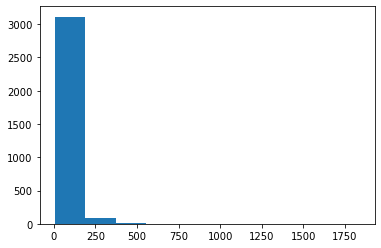

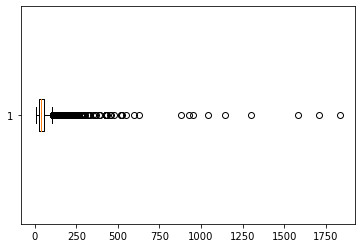

In [53]:
plot_show(feature)

6) 위 정보로부터 파악한 내용 정리

In [ ]:
# 20 ~ 40사이에 데이터가 가장 많음

7) 추가 분석사항 도출

In [ ]:
# url 길이와 악성사이트가 상관관계가 있는지

#### 2. url_num_hypens_dom

In [55]:
feature = 'url_num_hyphens_dom'

1) 변수가 내포하고 있는 의미

In [46]:
# url 내 하이픈 개수

2) 변수가 수치형인지, 범주형인지

In [47]:
df[feature].head() # 수치형

0    0.0
1    0.0
2    0.0
3    0.0
4    2.0
Name: url_num_hyphens_dom, dtype: float64

3) 결측치 존재 여부 및 조치 방안

In [48]:
df[feature].isna().sum()

0

4) 기초 통계량 확인

In [49]:
df[feature].describe()

count    3233.000000
mean        0.421590
std         0.861794
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max        14.000000
Name: url_num_hyphens_dom, dtype: float64

5) 데이터 분포 확인

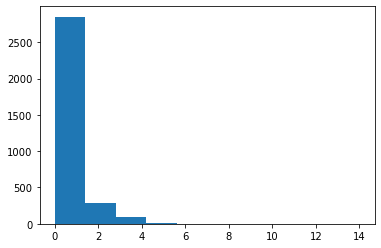

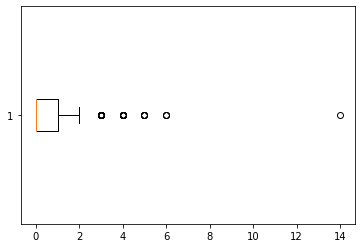

In [56]:
plot_show(feature)

6) 위 정보로부터 파악한 내용 정리

In [ ]:
# 0이 과반수 이상

7) 추가 분석사항 도출

#### 3. url_domain_len

In [57]:
feature = 'url_domain_len'

1) 변수가 내포하고 있는 의미

In [58]:
#  URL의 도메인 길이

2) 변수가 수치형인지, 범주형인지

In [59]:
df[feature].head() # 수치형

0    15.0
1    17.0
2    16.0
3    14.0
4    27.0
Name: url_domain_len, dtype: float64

3) 결측치 존재 여부 및 조치 방안

In [60]:
df[feature].isna().sum() # 1개

1

In [68]:
idx = df.loc[df[feature].isna()].index[0]
df = df.drop(idx, axis=0)

IndexError: index 0 is out of bounds for axis 0 with size 0

4) 기초 통계량 확인

In [66]:
df[feature].describe()

count    3232.000000
mean       20.509592
std         9.871500
min         4.000000
25%        14.000000
50%        17.500000
75%        24.000000
max       109.000000
Name: url_domain_len, dtype: float64

5) 데이터 분포 확인

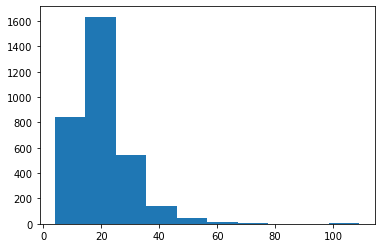

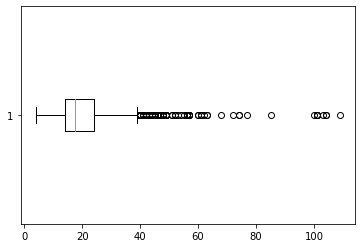

In [67]:
plot_show(feature)

6) 위 정보로부터 파악한 내용 정리

In [ ]:
# 10-30이 가장 많음

7) 추가 분석사항 도출

#### 4. url_path_len

In [69]:
feature = 'url_path_len'

1) 변수가 내포하고 있는 의미

In [70]:
# URL의 경로 길이

2) 변수가 수치형인지, 범주형인지

In [71]:
df[feature].head() # 수치형

0     8.0
1    58.0
2     4.0
3    13.0
4    12.0
Name: url_path_len, dtype: float64

3) 결측치 존재 여부 및 조치 방안

In [72]:
df[feature].isna().sum()

1

In [74]:
idx = df.loc[df[feature].isna()].index[0]
df = df.drop(idx, axis=0)

In [75]:
df[feature].isna().sum()

0

4) 기초 통계량 확인

In [73]:
df[feature].describe()

count    3231.000000
mean       30.514392
std        82.670398
min         0.000000
25%         1.000000
50%        13.000000
75%        32.000000
max      1816.000000
Name: url_path_len, dtype: float64

5) 데이터 분포 확인

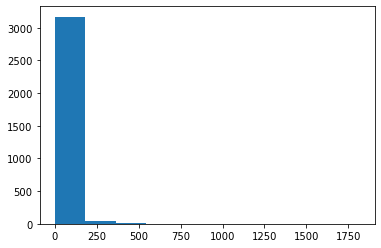

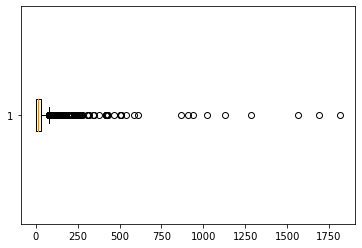

In [77]:
plot_show(feature)

6) 위 정보로부터 파악한 내용 정리

In [ ]:
# 이상치 값들로 인해 통계량에 영향을 많이 줌

7) 추가 분석사항 도출

#### 5. url_ip_present

In [78]:
feature = 'url_ip_present'

1) 변수가 내포하고 있는 의미

In [79]:
# URL내 IP표시 여부

2) 변수가 수치형인지, 범주형인지

In [81]:
df[feature].unique() # 범주형

array([0., 1.])

3) 결측치 존재 여부 및 조치 방안

In [82]:
df[feature].isna().sum()

0

4) 기초 통계량 확인

In [83]:
df[feature].describe()

count    3231.000000
mean        0.060972
std         0.239316
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         1.000000
Name: url_ip_present, dtype: float64

5) 데이터 분포 확인

0.0    3034
1.0     197
Name: url_ip_present, dtype: int64


C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


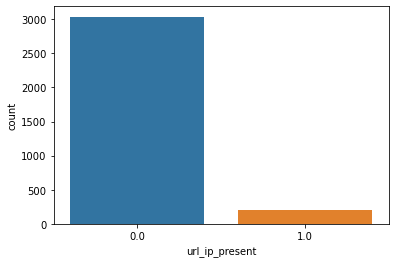

In [96]:
temp = df[feature].value_counts()
print(temp)

sns.countplot(df[feature])
plt.show()

6) 위 정보로부터 파악한 내용 정리

In [ ]:
# IP 표시가 안된 url이 많음

7) 추가 분석사항 도출

#### 6. html_num_tags('iframe')

In [104]:
feature = "html_num_tags('iframe')"

1) 변수가 내포하고 있는 의미

In [102]:
# HTML내 'iframe' 태그 개수
# iframe : 해당 웹 페이지 안에 어떠한 제한 없이 다른 페이지를 불러와서 삽입 

2) 변수가 수치형인지, 범주형인지

In [110]:
df[feature].head() # 수치형

0    0.0
1    0.0
2    1.0
3    0.0
4    0.0
Name: html_num_tags('iframe'), dtype: float64

3) 결측치 존재 여부 및 조치 방안

In [111]:
df[feature].isna().sum()

0

4) 기초 통계량 확인

In [112]:
df[feature].describe()

count    3231.000000
mean        0.216961
std         0.918491
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max        26.000000
Name: html_num_tags('iframe'), dtype: float64

5) 데이터 분포 확인

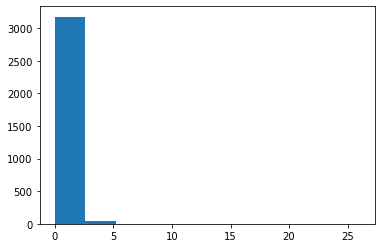

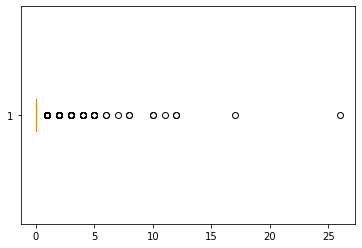

In [113]:
plot_show(feature)

6) 위 정보로부터 파악한 내용 정리

In [ ]:
# 거의 없음, 이상치는 눈여겨 볼 필요가 있을 듯!

7) 추가 분석사항 도출

#### 7. html_num_tags('applet')

In [114]:
feature = "html_num_tags('applet')"

1) 변수가 내포하고 있는 의미

In [115]:
# HTML내 'applet' 태그 개수
# 문서에 포함되는 애플릿(웹 페이지에 포함되어 작은 기능을 수행하는 프로그램)

2) 변수가 수치형인지, 범주형인지

In [116]:
df[feature].head() # 수치형

0    0.0
1    0.0
2    0.0
3    0.0
4    0.0
Name: html_num_tags('applet'), dtype: float64

3) 결측치 존재 여부 및 조치 방안

In [117]:
df[feature].isna().sum()

0

4) 기초 통계량 확인

In [118]:
df[feature].describe()

count    3231.0
mean        0.0
std         0.0
min         0.0
25%         0.0
50%         0.0
75%         0.0
max         0.0
Name: html_num_tags('applet'), dtype: float64

5) 데이터 분포 확인

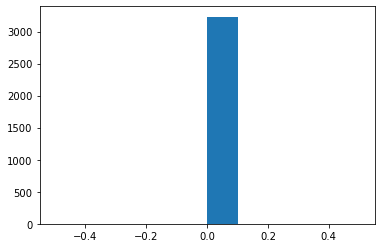

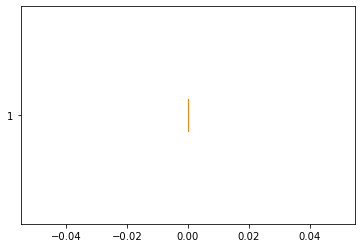

In [119]:
plot_show(feature)

6) 위 정보로부터 파악한 내용 정리

In [ ]:
# 없음

7) 추가 분석사항 도출

#### 8. html_num_tags('script')

In [120]:
feature = "html_num_tags('script')"

1) 변수가 내포하고 있는 의미

In [121]:
# HTML내 'script' 태그 개수
# <script> 태그는 자바스크립트와 같은 클라이언트 사이드 스크립트(client-side scripts) 정의

2) 변수가 수치형인지, 범주형인지

In [122]:
df[feature].head() # 수치형

0     7.0
1    18.0
2    33.0
3    15.0
4    10.0
Name: html_num_tags('script'), dtype: float64

3) 결측치 존재 여부 및 조치 방안

In [123]:
df[feature].isna().sum()

0

4) 기초 통계량 확인

In [124]:
df[feature].describe()

count    3231.000000
mean        8.659239
std        12.769059
min         0.000000
25%         2.000000
50%         4.000000
75%        12.000000
max       267.000000
Name: html_num_tags('script'), dtype: float64

5) 데이터 분포 확인

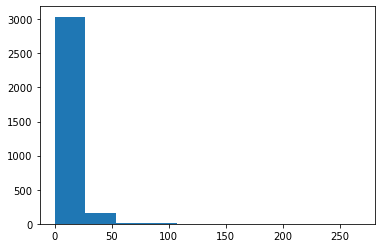

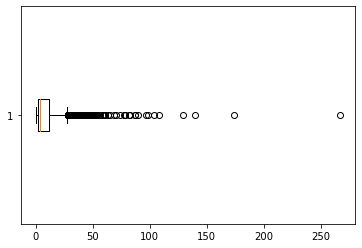

In [125]:
plot_show(feature)

6) 위 정보로부터 파악한 내용 정리

In [ ]:
# 0-15 사이 가장 많음 왼쪽으로 많이 치우쳐진 그래프

7) 추가 분석사항 도출

#### 9. html_num_tags('a')

In [126]:
feature = "html_num_tags('a')"

1) 변수가 내포하고 있는 의미

In [127]:
# HTML내 'a' 태그 개수
# 하이퍼링크를 걸어주는 태그

2) 변수가 수치형인지, 범주형인지

In [128]:
df[feature].head() # 수치형

0      0.0
1     21.0
2     70.0
3     55.0
4    321.0
Name: html_num_tags('a'), dtype: float64

3) 결측치 존재 여부 및 조치 방안

In [129]:
df[feature].isna().sum()

0

4) 기초 통계량 확인

In [130]:
df[feature].describe()

count     3231.000000
mean        63.254101
std        360.632590
min          0.000000
25%          2.000000
50%         15.000000
75%         49.000000
max      13451.000000
Name: html_num_tags('a'), dtype: float64

5) 데이터 분포 확인

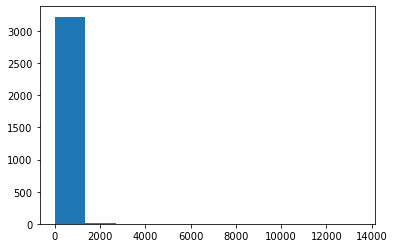

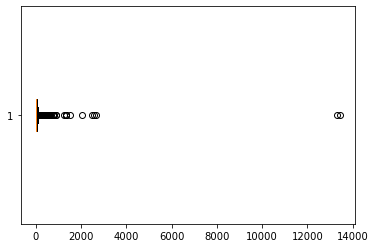

In [131]:
plot_show(feature)

6) 위 정보로부터 파악한 내용 정리

In [ ]:
# 이상치 눈여겨 볼 필요 있음

7) 추가 분석사항 도출

#### 10. url_hostname_len

In [156]:
feature = "url_hostname_len"

1) 변수가 내포하고 있는 의미

In [157]:
# URL의 hostname 길이

2) 변수가 수치형인지, 범주형인지

In [158]:
df[feature].head() # 수치형

0    15.0
1    17.0
2    16.0
3    14.0
4    27.0
Name: url_hostname_len, dtype: float64

3) 결측치 존재 여부 및 조치 방안

In [159]:
df[feature].isna().sum()

0

4) 기초 통계량 확인

In [160]:
df[feature].describe()

count    3231.000000
mean       20.450944
std         9.902215
min         4.000000
25%        14.000000
50%        17.000000
75%        24.000000
max       109.000000
Name: url_hostname_len, dtype: float64

5) 데이터 분포 확인

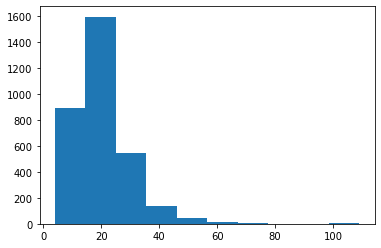

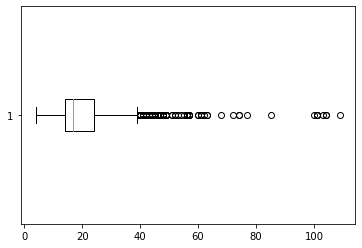

In [161]:
plot_show(feature)

6) 위 정보로부터 파악한 내용 정리

In [ ]:
# 평균 20, 이상치 !

7) 추가 분석사항 도출

#### 11. url_entropy

In [178]:
feature = "url_entropy"

1) 변수가 내포하고 있는 의미

In [179]:
# URL 복잡도

2) 변수가 수치형인지, 범주형인지

In [180]:
df[feature].head() # 수치형

0    4.260333
1    4.636107
2    3.708966
3    4.025592
4    4.631833
Name: url_entropy, dtype: float64

3) 결측치 존재 여부 및 조치 방안

In [181]:
df[feature].isna().sum()

0

4) 기초 통계량 확인

In [182]:
df[feature].describe()

count    3231.000000
mean        4.232582
std         0.394697
min         2.737839
25%         3.992151
50%         4.195816
75%         4.470114
max         5.821782
Name: url_entropy, dtype: float64

5) 데이터 분포 확인

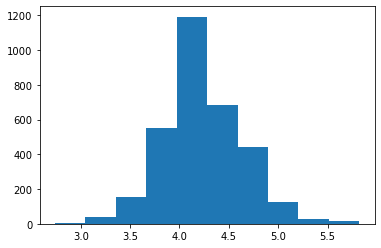

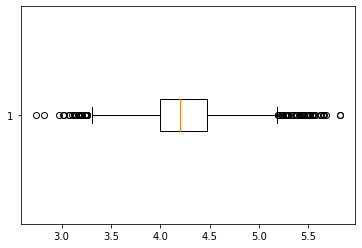

In [183]:
plot_show(feature)

6) 위 정보로부터 파악한 내용 정리

In [ ]:
# 정규분포의 형태

7) 추가 분석사항 도출

## <b>Q2. 데이터 이변량 분석하기

* 자료의 종류에 맞게 X --> Y 에 대해서 그래프(시각화)와 가설검정(수치화)를 수행하고 결과를 평가합니다.
* 가설검정시 다음의 항목을 참조하여 수행합니다.
    * 적절한 유의수준
    * 숫자 --> 숫자 : 상관분석
    * 범주 --> 범주 : 카이제곱검정
    * 범주 --> 숫자 : t검정, 분산분석
    * 숫자 --> 범주 : 로지스틱 회귀모형을 통해, 회귀계수의 P.value로 검정을 수행합니다.

In [148]:
temp = df.loc[:, ['Result_v1','url_len', 'url_num_hyphens_dom', 'url_path_len', 'url_domain_len', 'url_ip_present', "html_num_tags('iframe')", "html_num_tags('script')", "html_num_tags('a')"]]
temp = df.copy()

In [149]:
temp['Result_v1'] = temp['Result_v1'].map({'malicious' : 1, 'benign' : 0})

In [150]:
temp.head()

,url_len,url_num_hyphens_dom,url_path_len,url_domain_len,url_hostname_len,url_num_dots,url_num_underscores,url_query_len,url_num_query_para,url_ip_present,...,html_num_tags('script'),html_num_tags('embed'),html_num_tags('object'),html_num_tags('div'),html_num_tags('head'),html_num_tags('body'),html_num_tags('form'),html_num_tags('a'),html_num_tags('applet'),Result_v1
0,23.0,0.0,8.0,15.0,15.0,2.0,0.0,0.0,0.0,0.0,...,7.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1
1,75.0,0.0,58.0,17.0,17.0,6.0,0.0,0.0,0.0,0.0,...,18.0,0.0,0.0,20.0,1.0,1.0,0.0,21.0,0.0,0
2,20.0,0.0,4.0,16.0,16.0,2.0,0.0,0.0,0.0,0.0,...,33.0,0.0,0.0,101.0,1.0,1.0,3.0,70.0,0.0,0
3,27.0,0.0,13.0,14.0,14.0,3.0,0.0,0.0,0.0,0.0,...,15.0,0.0,0.0,151.0,1.0,1.0,1.0,55.0,0.0,0
4,39.0,2.0,12.0,27.0,27.0,2.0,0.0,0.0,0.0,0.0,...,10.0,0.0,0.0,332.0,1.0,1.0,0.0,321.0,0.0,0


In [151]:
temp.corr()

,url_len,url_num_hyphens_dom,url_path_len,url_domain_len,url_hostname_len,url_num_dots,url_num_underscores,url_query_len,url_num_query_para,url_ip_present,...,html_num_tags('script'),html_num_tags('embed'),html_num_tags('object'),html_num_tags('div'),html_num_tags('head'),html_num_tags('body'),html_num_tags('form'),html_num_tags('a'),html_num_tags('applet'),Result_v1
url_len,1.000000,-0.025183,0.944497,0.001670,0.002085,0.267134,0.307256,0.318540,0.267502,-0.067771,...,-0.026803,-0.012114,-0.021489,-0.013241,0.074980,0.043752,-0.037282,-0.019775,NaN,-0.006429
url_num_hyphens_dom,-0.025183,1.000000,-0.097643,0.589203,0.590278,-0.085324,-0.063695,0.001715,-0.002627,-0.124600,...,-0.110263,-0.052932,-0.048672,-0.013765,0.039036,-0.043295,0.038427,-0.036904,NaN,0.355480
url_path_len,0.944497,-0.097643,1.000000,-0.123280,-0.123081,0.196425,0.254179,0.011303,0.010422,-0.037249,...,0.006749,-0.003340,-0.015291,-0.008044,0.078578,-0.006032,-0.042510,-0.008870,NaN,-0.113835
url_domain_len,0.001670,0.589203,-0.123280,1.000000,0.998956,0.082025,-0.092685,0.014915,0.015721,-0.150800,...,-0.103895,-0.012265,-0.029448,-0.002495,0.002868,0.031097,0.033835,-0.035063,NaN,0.380448
url_hostname_len,0.002085,0.590278,-0.123081,0.998956,1.000000,0.078337,-0.094091,0.016032,0.016803,-0.169295,...,-0.101211,-0.011445,-0.030490,-0.001540,0.002779,0.031446,0.036627,-0.033953,NaN,0.384489
url_num_dots,0.267134,-0.085324,0.196425,0.082025,0.078337,1.000000,0.261850,0.227932,0.197153,0.184992,...,-0.086458,-0.030750,-0.017976,-0.027272,-0.024784,-0.000531,-0.066137,-0.027895,NaN,-0.047256
url_num_underscores,0.307256,-0.063695,0.254179,-0.092685,-0.094091,0.261850,1.000000,0.246116,0.245183,-0.052211,...,-0.069631,-0.029422,-0.021538,-0.017179,0.058713,0.031360,-0.079358,-0.007495,NaN,-0.133808
url_query_len,0.318540,0.001715,0.011303,0.014915,0.016032,0.227932,0.246116,1.000000,0.834315,-0.048321,...,-0.069375,-0.024240,-0.011191,-0.016998,-0.001409,0.150485,-0.001790,-0.023486,NaN,0.189689
url_num_query_para,0.267502,-0.002627,0.010422,0.015721,0.016803,0.197153,0.245183,0.834315,1.000000,-0.046998,...,-0.066136,-0.023577,-0.016486,-0.015185,-0.019294,0.109691,-0.005181,-0.022982,NaN,0.184497
url_ip_present,-0.067771,-0.124600,-0.037249,-0.150800,-0.169295,0.184992,-0.052211,-0.048321,-0.046998,1.000000,...,-0.086306,-0.032573,0.041407,-0.031192,0.012362,-0.018434,-0.077854,-0.035891,NaN,-0.076236


# <b>Step 2. 데이터 전처리
---

## <b>Q3. 중복 데이터 제거
### 우리가 접속하는 대부분의 웹사이트는 정상 사이트입니다.
### 또한, 특정 몇 개 사이트(ex. google, instagram, facebook 등)에 접속 빈도가 높습니다.
### 편중된 데이터는 모델 학습에 안 좋은 영향을 주기 때문에 중복 데이터 제거를 통해 해결합니다.
### 이 과정은 데이터 전처리 시 반드시 해야 하는 과정은 아니며, 프로젝트/데이터 성격에 맞게 결정하시면 됩니다.

### <span style="color:darkred">[문제1] df info()를 통해 데이터를 확인하고 중복된 데이터는 삭제해주세요. 삭제 후 info()를 통해 이전 데이터와 비교해 보세요.<span>

In [23]:
# 데이터 프레임의 info를 확인합니다.
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3664 entries, 0 to 3663
Data columns (total 24 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   url_len                  3664 non-null   float64
 1   url_num_hyphens_dom      3664 non-null   float64
 2   url_path_len             3663 non-null   float64
 3   url_domain_len           3663 non-null   float64
 4   url_hostname_len         3664 non-null   float64
 5   url_num_dots             3664 non-null   float64
 6   url_num_underscores      3664 non-null   float64
 7   url_query_len            3664 non-null   float64
 8   url_num_query_para       3664 non-null   float64
 9   url_ip_present           3664 non-null   float64
 10  url_entropy              3664 non-null   float64
 11  url_chinese_present      3664 non-null   float64
 12  url_port                 3664 non-null   float64
 13  html_num_tags('iframe')  3664 non-null   float64
 14  html_num_tags('script') 

In [24]:
df.isna().sum()

url_len                    0
url_num_hyphens_dom        0
url_path_len               1
url_domain_len             1
url_hostname_len           0
url_num_dots               0
url_num_underscores        0
url_query_len              0
url_num_query_para         0
url_ip_present             0
url_entropy                0
url_chinese_present        0
url_port                   0
html_num_tags('iframe')    0
html_num_tags('script')    0
html_num_tags('embed')     0
html_num_tags('object')    0
html_num_tags('div')       0
html_num_tags('head')      0
html_num_tags('body')      0
html_num_tags('form')      0
html_num_tags('a')         0
html_num_tags('applet')    0
Result_v1                  0
dtype: int64

In [40]:
# 중복 데이터 제거를 제거합니다.
df = df.drop_duplicates()

In [41]:
# 데이터 프레임의 info를 확인합니다.
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3233 entries, 0 to 3663
Data columns (total 24 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   url_len                  3233 non-null   float64
 1   url_num_hyphens_dom      3233 non-null   float64
 2   url_path_len             3232 non-null   float64
 3   url_domain_len           3232 non-null   float64
 4   url_hostname_len         3233 non-null   float64
 5   url_num_dots             3233 non-null   float64
 6   url_num_underscores      3233 non-null   float64
 7   url_query_len            3233 non-null   float64
 8   url_num_query_para       3233 non-null   float64
 9   url_ip_present           3233 non-null   float64
 10  url_entropy              3233 non-null   float64
 11  url_chinese_present      3233 non-null   float64
 12  url_port                 3233 non-null   float64
 13  html_num_tags('iframe')  3233 non-null   float64
 14  html_num_tags('script') 

---

## <b>Q4. 텍스트와 범주형 특성 처리

### 기계가 데이터를 인식할 수 있도록 텍스트 데이터를 수치형 데이터로 변경합니다.
 - replace() 함수를 이용한 텍스트와 범주형 특성 처리

**<span style="color:green">[참고링크] 공식 Document**</span>

* replace(https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.replace.html)
* unique(https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.unique.html)

### <span style="color:blue">[예시] df_ex 데이터 프레임에서 replace 함수를 활용 'CA'는'California'로 'NY'는 'NewYork'으로 변경합니다.<span>

In [16]:
import pandas as pd

df_ex = pd.DataFrame({'name': ['Alice','Bob','Charlie','Dave','Ellen','Frank'],
                   'age': [24,42,18,68,24,30],
                   'state': ['NY','CA','CA','TX','CA','NY'],
                   'point': [64,24,70,70,88,57]}
                  )

print(df_ex)

      name  age state  point
0    Alice   24    NY     64
1      Bob   42    CA     24
2  Charlie   18    CA     70
3     Dave   68    TX     70
4    Ellen   24    CA     88
5    Frank   30    NY     57


In [42]:
target = "Result_v1"

### <span style="color:darkred">[문제2] replace() 함수를 활용 'benign'은 1로 'malicious'은 -1로 변경해주세요. 삭제 후 df['Result_v1'] 전후 데이터를 비교해 보세요.<span>

In [43]:
# 텍스트 데이터를 수치형 데이터로 변경 전 unique() 함수를 통해 유일한 값 확인
df[target].unique()

array(['malicious', 'benign'], dtype=object)

In [44]:
# replace() 함수를 사용 텍스트 데이터를 수치형 데이터로 변경합니다.
df[target] = df[target].map({'benign' : 1, 'malicious' : -1})

In [45]:
# 텍스트 데이터를 수치형 데이터로 후 unique() 함수를 통해 유일한 값 확인
df[target].unique()

array([-1,  1], dtype=int64)

In [46]:
df.head()

,url_len,url_num_hyphens_dom,url_path_len,url_domain_len,url_hostname_len,url_num_dots,url_num_underscores,url_query_len,url_num_query_para,url_ip_present,...,html_num_tags('script'),html_num_tags('embed'),html_num_tags('object'),html_num_tags('div'),html_num_tags('head'),html_num_tags('body'),html_num_tags('form'),html_num_tags('a'),html_num_tags('applet'),Result_v1
0,23.0,0.0,8.0,15.0,15.0,2.0,0.0,0.0,0.0,0.0,...,7.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,-1
1,75.0,0.0,58.0,17.0,17.0,6.0,0.0,0.0,0.0,0.0,...,18.0,0.0,0.0,20.0,1.0,1.0,0.0,21.0,0.0,1
2,20.0,0.0,4.0,16.0,16.0,2.0,0.0,0.0,0.0,0.0,...,33.0,0.0,0.0,101.0,1.0,1.0,3.0,70.0,0.0,1
3,27.0,0.0,13.0,14.0,14.0,3.0,0.0,0.0,0.0,0.0,...,15.0,0.0,0.0,151.0,1.0,1.0,1.0,55.0,0.0,1
4,39.0,2.0,12.0,27.0,27.0,2.0,0.0,0.0,0.0,0.0,...,10.0,0.0,0.0,332.0,1.0,1.0,0.0,321.0,0.0,1


## <b>Q5. 결측치 처리

### 데이터 수집 과정에서 발생한 오류 등으로 인해 결측치가 포함된 경우가 많습니다.
### 모델링 전에 결측치를 확인하고 이를 정제하는 과정은 필요합니다.

### <span style="color:darkred">[문제3] 결측치의 존재를 확인하고 결측치가 포함된 데이터를 처리해보세요.<span>

In [1]:
# 결축치의 존재를 확인합니다.



In [47]:
# 결측치를 적절히 처리해줍니다.
del_col = ['url_chinese_present', "html_num_tags('applet')"]
df = df.drop(del_col, axis=1)

In [2]:
# 결축치의 존재를 확인합니다.



---

## <b>Q6. 데이터 탐색을 통해 새로운 변수 추가 혹은 불필요한 변수 제거

### AI모델의 성능 향상을 위해 기존의 변수를 조합해 새로운 변수를 만들어 내기도 하고
### 데이터 분석을 통해 필요없는 변수는 삭제하는 과정이 필요 합니다.

### <span style="color:darkred">[문제4] 상관관계 함수 및 데이터 시각화 등을 활용하며 데이터셋을 분석하고 컬럼을 추가/삭제 해보세요.<span>

In [49]:
df.corr()

,url_len,url_num_hyphens_dom,url_path_len,url_domain_len,url_hostname_len,url_num_dots,url_num_underscores,url_query_len,url_num_query_para,url_ip_present,...,html_num_tags('iframe'),html_num_tags('script'),html_num_tags('embed'),html_num_tags('object'),html_num_tags('div'),html_num_tags('head'),html_num_tags('body'),html_num_tags('form'),html_num_tags('a'),Result_v1
url_len,1.000000,-0.025237,0.944495,0.001745,0.002045,0.266999,0.307286,0.318562,0.267525,-0.068039,...,0.022133,-0.026747,-0.012090,-0.021466,-0.013244,0.074976,0.043764,-0.037248,-0.019765,0.006244
url_num_hyphens_dom,-0.025237,1.000000,-0.097799,0.589242,0.590701,-0.085595,-0.063760,0.001636,-0.002702,-0.124970,...,-0.015067,-0.110161,-0.052956,-0.048696,-0.013523,0.039020,-0.043301,0.038859,-0.036764,-0.354757
url_path_len,0.944495,-0.097799,1.000000,-0.123280,-0.123216,0.196456,0.254199,0.011324,0.010442,-0.037219,...,0.033600,0.006755,-0.003325,-0.015276,-0.008085,0.078575,-0.006023,-0.042580,-0.008888,0.113701
url_domain_len,0.001745,0.589242,-0.123280,1.000000,0.998956,0.081815,-0.092628,0.014953,0.015757,-0.151230,...,-0.011513,-0.103795,-0.012238,-0.029421,-0.002459,0.002865,0.031109,0.033959,-0.035025,-0.380568
url_hostname_len,0.002045,0.590701,-0.123216,0.998956,1.000000,0.077922,-0.094120,0.015964,0.016737,-0.169728,...,-0.010966,-0.101095,-0.011479,-0.030513,-0.001314,0.002782,0.031408,0.037062,-0.033816,-0.383864
url_num_dots,0.266999,-0.085595,0.196456,0.081815,0.077922,1.000000,0.261758,0.227858,0.197085,0.185695,...,-0.000508,-0.086567,-0.030769,-0.017996,-0.027358,-0.024778,-0.000544,-0.066370,-0.027959,0.047423
url_num_underscores,0.307286,-0.063760,0.254199,-0.092628,-0.094120,0.261758,1.000000,0.246138,0.245204,-0.052362,...,-0.027057,-0.069590,-0.029402,-0.021519,-0.017193,0.058710,0.031371,-0.079347,-0.007493,0.133613
url_query_len,0.318562,0.001636,0.011324,0.014953,0.015964,0.227858,0.246138,1.000000,0.834319,-0.048420,...,-0.028244,-0.069343,-0.024225,-0.011177,-0.017008,-0.001410,0.150491,-0.001790,-0.023484,-0.189746
url_num_query_para,0.267525,-0.002702,0.010442,0.015757,0.016737,0.197085,0.245204,0.834319,1.000000,-0.047094,...,-0.030607,-0.066105,-0.023562,-0.016472,-0.015195,-0.019295,0.109698,-0.005180,-0.022981,-0.184552
url_ip_present,-0.068039,-0.124970,-0.037219,-0.151230,-0.169728,0.185695,-0.052362,-0.048420,-0.047094,1.000000,...,-0.028006,-0.086630,-0.032640,0.041168,-0.031364,0.012347,-0.018471,-0.078473,-0.036030,0.077163


<AxesSubplot:>

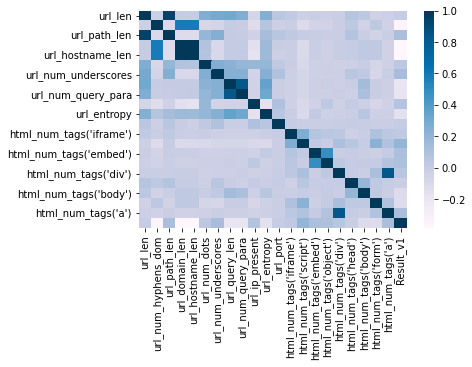

In [48]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.heatmap(df.corr(), cmap = plt.cm.PuBu)

In [175]:
# 모든 값이 0인 url_chinese_present, htmp_num_tags('applet') 제거
col = ['url_chinese_present', "html_num_tags('applet')"]
df = df.drop(col, axis=1)

<AxesSubplot:>

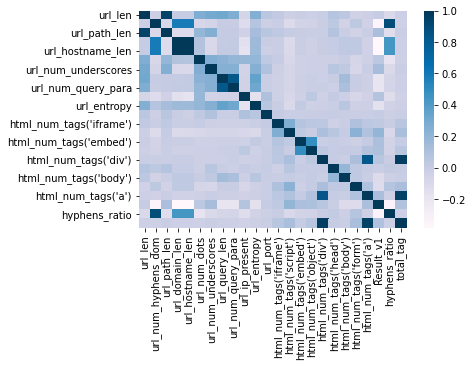

In [229]:
sns.heatmap(df.corr(), cmap = plt.cm.PuBu)

In [50]:
df['hyphens_ratio'] = df['url_num_hyphens_dom']/df['url_domain_len']
df.head()

,url_len,url_num_hyphens_dom,url_path_len,url_domain_len,url_hostname_len,url_num_dots,url_num_underscores,url_query_len,url_num_query_para,url_ip_present,...,html_num_tags('script'),html_num_tags('embed'),html_num_tags('object'),html_num_tags('div'),html_num_tags('head'),html_num_tags('body'),html_num_tags('form'),html_num_tags('a'),Result_v1,hyphens_ratio
0,23.0,0.0,8.0,15.0,15.0,2.0,0.0,0.0,0.0,0.0,...,7.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,-1,0.000000
1,75.0,0.0,58.0,17.0,17.0,6.0,0.0,0.0,0.0,0.0,...,18.0,0.0,0.0,20.0,1.0,1.0,0.0,21.0,1,0.000000
2,20.0,0.0,4.0,16.0,16.0,2.0,0.0,0.0,0.0,0.0,...,33.0,0.0,0.0,101.0,1.0,1.0,3.0,70.0,1,0.000000
3,27.0,0.0,13.0,14.0,14.0,3.0,0.0,0.0,0.0,0.0,...,15.0,0.0,0.0,151.0,1.0,1.0,1.0,55.0,1,0.000000
4,39.0,2.0,12.0,27.0,27.0,2.0,0.0,0.0,0.0,0.0,...,10.0,0.0,0.0,332.0,1.0,1.0,0.0,321.0,1,0.074074


In [51]:
df.corr()

,url_len,url_num_hyphens_dom,url_path_len,url_domain_len,url_hostname_len,url_num_dots,url_num_underscores,url_query_len,url_num_query_para,url_ip_present,...,html_num_tags('script'),html_num_tags('embed'),html_num_tags('object'),html_num_tags('div'),html_num_tags('head'),html_num_tags('body'),html_num_tags('form'),html_num_tags('a'),Result_v1,hyphens_ratio
url_len,1.000000,-0.025237,0.944495,0.001745,0.002045,0.266999,0.307286,0.318562,0.267525,-0.068039,...,-0.026747,-0.012090,-0.021466,-0.013244,0.074976,0.043764,-0.037248,-0.019765,0.006244,-0.034595
url_num_hyphens_dom,-0.025237,1.000000,-0.097799,0.589242,0.590701,-0.085595,-0.063760,0.001636,-0.002702,-0.124970,...,-0.110161,-0.052956,-0.048696,-0.013523,0.039020,-0.043301,0.038859,-0.036764,-0.354757,0.901047
url_path_len,0.944495,-0.097799,1.000000,-0.123280,-0.123216,0.196456,0.254199,0.011324,0.010442,-0.037219,...,0.006755,-0.003325,-0.015276,-0.008085,0.078575,-0.006023,-0.042580,-0.008888,0.113701,-0.086882
url_domain_len,0.001745,0.589242,-0.123280,1.000000,0.998956,0.081815,-0.092628,0.014953,0.015757,-0.151230,...,-0.103795,-0.012238,-0.029421,-0.002459,0.002865,0.031109,0.033959,-0.035025,-0.380568,0.418419
url_hostname_len,0.002045,0.590701,-0.123216,0.998956,1.000000,0.077922,-0.094120,0.015964,0.016737,-0.169728,...,-0.101095,-0.011479,-0.030513,-0.001314,0.002782,0.031408,0.037062,-0.033816,-0.383864,0.420268
url_num_dots,0.266999,-0.085595,0.196456,0.081815,0.077922,1.000000,0.261758,0.227858,0.197085,0.185695,...,-0.086567,-0.030769,-0.017996,-0.027358,-0.024778,-0.000544,-0.066370,-0.027959,0.047423,-0.129392
url_num_underscores,0.307286,-0.063760,0.254199,-0.092628,-0.094120,0.261758,1.000000,0.246138,0.245204,-0.052362,...,-0.069590,-0.029402,-0.021519,-0.017193,0.058710,0.031371,-0.079347,-0.007493,0.133613,-0.072618
url_query_len,0.318562,0.001636,0.011324,0.014953,0.015964,0.227858,0.246138,1.000000,0.834319,-0.048420,...,-0.069343,-0.024225,-0.011177,-0.017008,-0.001410,0.150491,-0.001790,-0.023484,-0.189746,0.001965
url_num_query_para,0.267525,-0.002702,0.010442,0.015757,0.016737,0.197085,0.245204,0.834319,1.000000,-0.047094,...,-0.066105,-0.023562,-0.016472,-0.015195,-0.019295,0.109698,-0.005180,-0.022981,-0.184552,-0.006217
url_ip_present,-0.068039,-0.124970,-0.037219,-0.151230,-0.169728,0.185695,-0.052362,-0.048420,-0.047094,1.000000,...,-0.086630,-0.032640,0.041168,-0.031364,0.012347,-0.018471,-0.078473,-0.036030,0.077163,-0.137887


In [52]:
arr = []
for index, row in df.iterrows():
    sum = 0
    for i in range(12, 21):
        sum += row[df.columns[i]]
    arr.append(sum)

df['total_tag'] = arr

In [53]:
df.head()

,url_len,url_num_hyphens_dom,url_path_len,url_domain_len,url_hostname_len,url_num_dots,url_num_underscores,url_query_len,url_num_query_para,url_ip_present,...,html_num_tags('embed'),html_num_tags('object'),html_num_tags('div'),html_num_tags('head'),html_num_tags('body'),html_num_tags('form'),html_num_tags('a'),Result_v1,hyphens_ratio,total_tag
0,23.0,0.0,8.0,15.0,15.0,2.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,-1,0.000000,9.0
1,75.0,0.0,58.0,17.0,17.0,6.0,0.0,0.0,0.0,0.0,...,0.0,0.0,20.0,1.0,1.0,0.0,21.0,1,0.000000,61.0
2,20.0,0.0,4.0,16.0,16.0,2.0,0.0,0.0,0.0,0.0,...,0.0,0.0,101.0,1.0,1.0,3.0,70.0,1,0.000000,210.0
3,27.0,0.0,13.0,14.0,14.0,3.0,0.0,0.0,0.0,0.0,...,0.0,0.0,151.0,1.0,1.0,1.0,55.0,1,0.000000,224.0
4,39.0,2.0,12.0,27.0,27.0,2.0,0.0,0.0,0.0,0.0,...,0.0,0.0,332.0,1.0,1.0,0.0,321.0,1,0.074074,665.0


In [54]:
df.corr()

,url_len,url_num_hyphens_dom,url_path_len,url_domain_len,url_hostname_len,url_num_dots,url_num_underscores,url_query_len,url_num_query_para,url_ip_present,...,html_num_tags('embed'),html_num_tags('object'),html_num_tags('div'),html_num_tags('head'),html_num_tags('body'),html_num_tags('form'),html_num_tags('a'),Result_v1,hyphens_ratio,total_tag
url_len,1.000000,-0.025237,0.944495,0.001745,0.002045,0.266999,0.307286,0.318562,0.267525,-0.068039,...,-0.012090,-0.021466,-0.013244,0.074976,0.043764,-0.037248,-0.019765,0.006244,-0.034595,-0.017553
url_num_hyphens_dom,-0.025237,1.000000,-0.097799,0.589242,0.590701,-0.085595,-0.063760,0.001636,-0.002702,-0.124970,...,-0.052956,-0.048696,-0.013523,0.039020,-0.043301,0.038859,-0.036764,-0.354757,0.901047,-0.027640
url_path_len,0.944495,-0.097799,1.000000,-0.123280,-0.123216,0.196456,0.254199,0.011324,0.010442,-0.037219,...,-0.003325,-0.015276,-0.008085,0.078575,-0.006023,-0.042580,-0.008888,0.113701,-0.086882,-0.008734
url_domain_len,0.001745,0.589242,-0.123280,1.000000,0.998956,0.081815,-0.092628,0.014953,0.015757,-0.151230,...,-0.012238,-0.029421,-0.002459,0.002865,0.031109,0.033959,-0.035025,-0.380568,0.418419,-0.020669
url_hostname_len,0.002045,0.590701,-0.123216,0.998956,1.000000,0.077922,-0.094120,0.015964,0.016737,-0.169728,...,-0.011479,-0.030513,-0.001314,0.002782,0.031408,0.037062,-0.033816,-0.383864,0.420268,-0.019391
url_num_dots,0.266999,-0.085595,0.196456,0.081815,0.077922,1.000000,0.261758,0.227858,0.197085,0.185695,...,-0.030769,-0.017996,-0.027358,-0.024778,-0.000544,-0.066370,-0.027959,0.047423,-0.129392,-0.030455
url_num_underscores,0.307286,-0.063760,0.254199,-0.092628,-0.094120,0.261758,1.000000,0.246138,0.245204,-0.052362,...,-0.029402,-0.021519,-0.017193,0.058710,0.031371,-0.079347,-0.007493,0.133613,-0.072618,-0.014454
url_query_len,0.318562,0.001636,0.011324,0.014953,0.015964,0.227858,0.246138,1.000000,0.834319,-0.048420,...,-0.024225,-0.011177,-0.017008,-0.001410,0.150491,-0.001790,-0.023484,-0.189746,0.001965,-0.022169
url_num_query_para,0.267525,-0.002702,0.010442,0.015757,0.016737,0.197085,0.245204,0.834319,1.000000,-0.047094,...,-0.023562,-0.016472,-0.015195,-0.019295,0.109698,-0.005180,-0.022981,-0.184552,-0.006217,-0.020911
url_ip_present,-0.068039,-0.124970,-0.037219,-0.151230,-0.169728,0.185695,-0.052362,-0.048420,-0.047094,1.000000,...,-0.032640,0.041168,-0.031364,0.012347,-0.018471,-0.078473,-0.036030,0.077163,-0.137887,-0.036701


---

## <b>Q7. train_test_split을 이용하여, train_x, test_x, train_y, test_y로 데이터 분리

### 모델을 학습하는 데에는 Train 데이터만 사용해야 합니다.
### 학습에 사용하지 않은 데이터를 통해 모델을 평가해야 합니다.
### 그러기 위해 Train / Test 데이터로 분리합니다.


**<span style="color:green">[참고링크] 공식 Document**</span>

* train_test_split(https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html)

### <span style="color:darkred">[문제5] train_test_split 함수를 사용하여 train 데이터와 test 데이터를 분리하고 각각의 shape를 확인하세요<span>

In [55]:
target = 'Result_v1'

x = df.drop(target, axis=1)
y = df.loc[:, target]

In [56]:
from sklearn.model_selection import train_test_split

x_train, x_val, y_train, y_val = train_test_split(x, y, test_size=0.3, random_state=2022)

In [57]:
x_train.shape, x_val.shape, y_train.shape, y_val.shape

((2263, 23), (970, 23), (2263,), (970,))

In [58]:
df.head()

,url_len,url_num_hyphens_dom,url_path_len,url_domain_len,url_hostname_len,url_num_dots,url_num_underscores,url_query_len,url_num_query_para,url_ip_present,...,html_num_tags('embed'),html_num_tags('object'),html_num_tags('div'),html_num_tags('head'),html_num_tags('body'),html_num_tags('form'),html_num_tags('a'),Result_v1,hyphens_ratio,total_tag
0,23.0,0.0,8.0,15.0,15.0,2.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,-1,0.000000,9.0
1,75.0,0.0,58.0,17.0,17.0,6.0,0.0,0.0,0.0,0.0,...,0.0,0.0,20.0,1.0,1.0,0.0,21.0,1,0.000000,61.0
2,20.0,0.0,4.0,16.0,16.0,2.0,0.0,0.0,0.0,0.0,...,0.0,0.0,101.0,1.0,1.0,3.0,70.0,1,0.000000,210.0
3,27.0,0.0,13.0,14.0,14.0,3.0,0.0,0.0,0.0,0.0,...,0.0,0.0,151.0,1.0,1.0,1.0,55.0,1,0.000000,224.0
4,39.0,2.0,12.0,27.0,27.0,2.0,0.0,0.0,0.0,0.0,...,0.0,0.0,332.0,1.0,1.0,0.0,321.0,1,0.074074,665.0


In [60]:
df.to_csv('data1.csv', index=False)